In [1]:
import csv
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
mpl.rcParams['font.sans-serif'] = [u'simHei']
mpl.rcParams['axes.unicode_minus'] = False

In [2]:
# pandas读入
data = pd.read_csv('./Advertising.csv')    # TV、Radio、Newspaper、Sales
x = data[['TV', 'Radio', 'Newspaper']]
# x = data[['TV', 'Radio']]
y = data['Sales']
print(x)
print(y)

        TV  Radio  Newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
5      8.7   48.9       75.0
6     57.5   32.8       23.5
7    120.2   19.6       11.6
8      8.6    2.1        1.0
9    199.8    2.6       21.2
10    66.1    5.8       24.2
11   214.7   24.0        4.0
12    23.8   35.1       65.9
13    97.5    7.6        7.2
14   204.1   32.9       46.0
15   195.4   47.7       52.9
16    67.8   36.6      114.0
17   281.4   39.6       55.8
18    69.2   20.5       18.3
19   147.3   23.9       19.1
20   218.4   27.7       53.4
21   237.4    5.1       23.5
22    13.2   15.9       49.6
23   228.3   16.9       26.2
24    62.3   12.6       18.3
25   262.9    3.5       19.5
26   142.9   29.3       12.6
27   240.1   16.7       22.9
28   248.8   27.1       22.9
29    70.6   16.0       40.8
..     ...    ...        ...
170   50.0   11.6       18.4
171  164.5   20.9       47.4
172   19.6   2

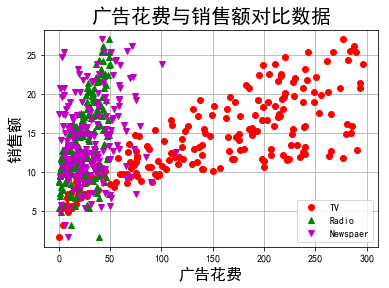

In [3]:
# 绘制1
plt.figure(facecolor='w')
plt.plot(data['TV'], y, 'ro', label='TV')
plt.plot(data['Radio'], y, 'g^', label='Radio')
plt.plot(data['Newspaper'], y, 'mv', label='Newspaer')
plt.legend(loc='lower right')
plt.xlabel(u'广告花费', fontsize=16)
plt.ylabel(u'销售额', fontsize=16)
plt.title(u'广告花费与销售额对比数据', fontsize=20)
plt.grid()
plt.show()

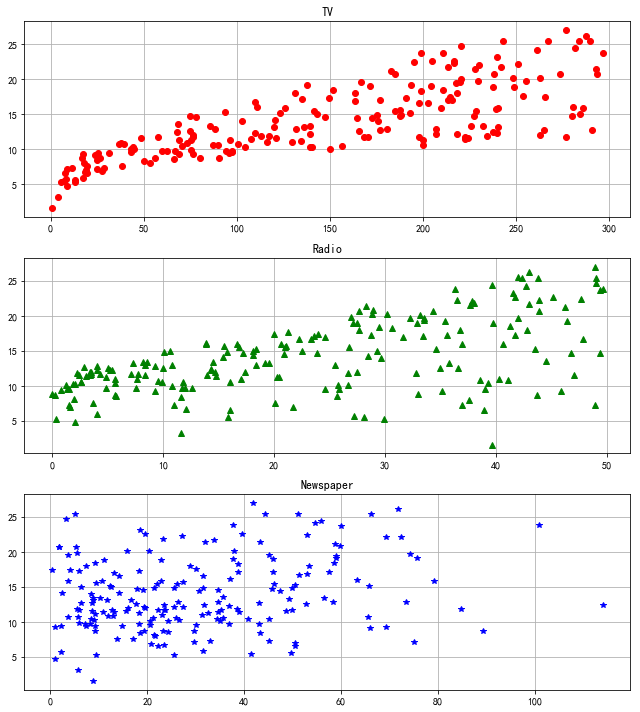

In [4]:
# 绘制2
plt.figure(facecolor='w', figsize=(9, 10))
plt.subplot(311)
plt.plot(data['TV'], y, 'ro')
plt.title('TV')
plt.grid()
plt.subplot(312)
plt.plot(data['Radio'], y, 'g^')
plt.title('Radio')
plt.grid()
plt.subplot(313)
plt.plot(data['Newspaper'], y, 'b*')
plt.title('Newspaper')
plt.grid()
plt.tight_layout()
plt.show()

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=1)
print(type(x_test))
print(x_train.shape, y_train.shape)
linreg = LinearRegression()
model = linreg.fit(x_train, y_train)
print(model)
# coef_:权重   intercept：截距或偏置
print(linreg.coef_, linreg.intercept_)

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


<class 'pandas.core.frame.DataFrame'>
(160, 3) (160,)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
[0.0468431  0.17854434 0.00258619] 2.907947020816433


In [6]:
# 排序，以便绘制折线图
order = y_test.argsort(axis=0)
y_test = y_test.values[order]
print(y_test)
x_test = x_test.values[order, :]
y_hat = linreg.predict(x_test)
mse = np.average((y_hat - np.array(y_test)) ** 2)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
print('MSE = ', mse)
print('RMSE = ', rmse)
print('R2 = ',linreg.score(x_train, y_train))
print('R2 = ',linreg.score(x_test, y_test))

[ 7.6  8.5  9.5  9.5 10.1 10.5 10.7 11.  11.3 11.5 11.5 11.7 11.9 11.9
 12.5 12.8 12.9 12.9 13.4 14.5 14.8 14.9 15.5 15.9 15.9 16.6 16.7 16.9
 17.1 17.3 17.4 17.6 18.4 18.9 19.6 20.2 22.3 23.2 23.8 25.5]
MSE =  1.9918855518287906
RMSE =  1.4113417558581587
R2 =  0.8959372632325174
R2 =  0.8927605914615384


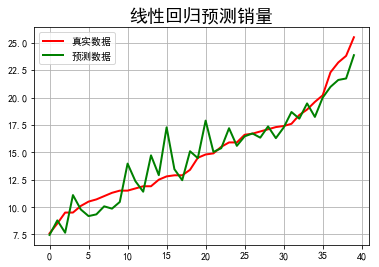

In [7]:
plt.figure(facecolor='w')
t = np.arange(len(x_test))
plt.plot(t, y_test, 'r-', linewidth=2, label=u'真实数据')
plt.plot(t, y_hat, 'g-', linewidth=2, label=u'预测数据')
#plt.legend(loc='upper right')
plt.title(u'线性回归预测销量', fontsize=18)
plt.legend()
plt.grid(b=True)
plt.show()

对特征进行标准化后的模型

In [ ]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
s.fit(x)
x = s.transform(x)
x

In [9]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
s.fit(x)
x = s.transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=1)
print(type(x_test))
print(x_train.shape, y_train.shape)
linreg = LinearRegression()
model = linreg.fit(x_train, y_train)
print(model)
print(linreg.coef_, linreg.intercept_)
order = y_test.argsort(axis=0)
y_test = y_test.values[order]
x_test = x_test[order, :]
y_hat = linreg.predict(x_test)
mse = np.average((y_hat - np.array(y_test)) ** 2)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
print('MSE = ', mse)
print('RMSE = ', rmse)
print('R2 = ',linreg.score(x_train, y_train))
print('R2 = ',linreg.score(x_test, y_test))

<class 'numpy.ndarray'>
(160, 3) (160,)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
[4.01161205 2.64417846 0.05618258] 14.02854796400448
MSE =  1.991885551828787
RMSE =  1.4113417558581576
R2 =  0.8959372632325174
R2 =  0.8927605914615385


C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


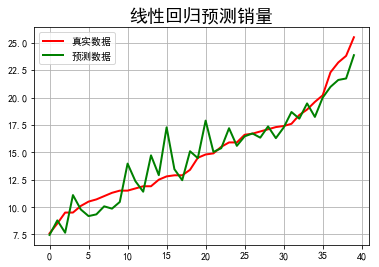

In [14]:
plt.figure(facecolor='w')
t = np.arange(len(x_test))
plt.plot(t, y_test, 'r-', linewidth=2, label=u'真实数据')
plt.plot(t, y_hat, 'g-', linewidth=2, label=u'预测数据')
#plt.legend(loc='upper right')
plt.title(u'线性回归预测销量', fontsize=18)
plt.legend()
plt.grid(b=True)
plt.show()